In [439]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [440]:
train_data = pd.read_excel(r"C:\Users\HP\Music\Data_Train.xlsx")

In [441]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [442]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [443]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [444]:
train_data['Total_Stops'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10678    False
10679    False
10680    False
10681    False
10682    False
Name: Total_Stops, Length: 10683, dtype: bool

In [445]:
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [446]:
train_data.dropna(inplace=True)

In [447]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [448]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [449]:
train_data.info(memory_usage='deep' )

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 6.3 MB


In [450]:
data = train_data.copy()

In [451]:
def change_into_Datetime(col):
    data[col] = pd.to_datetime(data[col])

In [452]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [453]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [454]:
for feature in ['Dep_Time', 'Arrival_Time','Date_of_Journey']:
    change_into_Datetime(feature)

In [455]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [456]:
data["Journey_day"] = data['Date_of_Journey'].dt.day

In [457]:
data["Journey_month"]= data['Date_of_Journey'].dt.month

In [458]:
data["Journey_year"]  = data['Date_of_Journey'].dt.year

In [459]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-14 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-14 05:50:00,2025-04-14 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-14 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019


In [460]:
def extract_hour_min(df, col):
    df[col+"_hour"] = df[col].dt.hour
    df[col+"_minute"] = df[col].dt.minute
    return df.head(3)

In [461]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

In [462]:
extract_hour_min(data , 'Arrival_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-14 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-14 05:50:00,2025-04-14 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-14 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25


In [463]:
extract_hour_min(data , 'Dep_Time')

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-04-14 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-14 05:50:00,2025-04-14 13:15:00,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-04-14 09:25:00,2025-06-10 04:25:00,19h,2 stops,No info,13882,9,6,2019,4,25,9,25


In [464]:
cols_to_drop = ["Arrival_Time","Dep_Time"]

data.drop(cols_to_drop, axis = 1 , inplace = True)

In [465]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25


In [466]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute'],
      dtype='object')

In [467]:
def flight_dep_time(x):

    if (x>4) and (x<=8):
        return "Early morning"
    elif (x>8) and (x<=12):
        return "morning"
    elif (x>12) and (x<=16):
        return "Afternoon"
    elif (x>16) and (x<=20):
        return "Evening"
    elif (x>20) and (x<=24):
        return "Night"
    else:
        return "Late night"

<Axes: xlabel='Dep_Time_hour'>

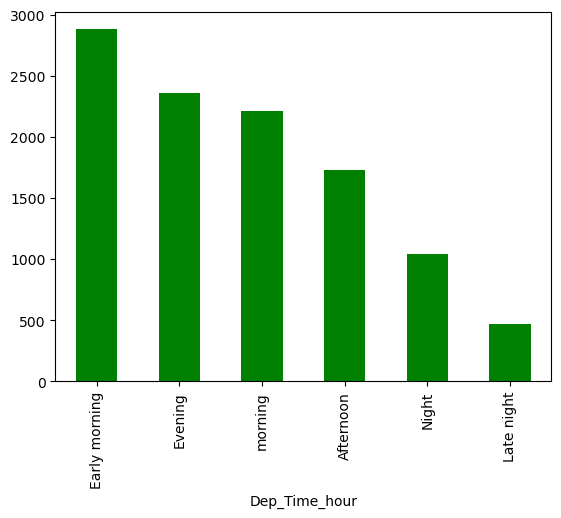

In [468]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind = "bar", color = 'g')

In [469]:
!pip install plotly
!pip install chart_studio


In [470]:
!pip install cufflinks

In [471]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()


In [472]:
data["Dep_Time_hour"].apply(flight_dep_time).value_counts().iplot(kind ="bar" , color = "blue")

In [473]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50


In [474]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' + '0m'

    return x

In [475]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [476]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [477]:
data['Duration'][0]

'2h 50m'

In [478]:
'2h 50m'.split(' ')

['2h', '50m']

In [479]:
'2h 50m'.split(' ')[0]

'2h'

In [480]:
int('2h 50m'.split(' ')[0][0:-1])

2

In [481]:
int('2h 50m'.split(' ')[1][0:-1])

50

In [482]:
data['Duration_hours'] = data['Duration'].apply(lambda x: int('2h 50m'.split(' ')[0][0:-1]))

In [483]:
data['Duration_minutes'] = data['Duration'].apply(lambda x: int('2h 50m'.split(' ')[1][0:-1]))

In [484]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,2,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25,2,50


In [485]:
data['Duration_total_mins'] = data['Duration'].str.replace('h', "*60").str.replace(' ' , '+').str.replace('m' , '*1').apply(eval)

In [486]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_minutes', 'Duration_total_mins'],
      dtype='object')

<Axes: xlabel='Duration_total_mins', ylabel='Price'>

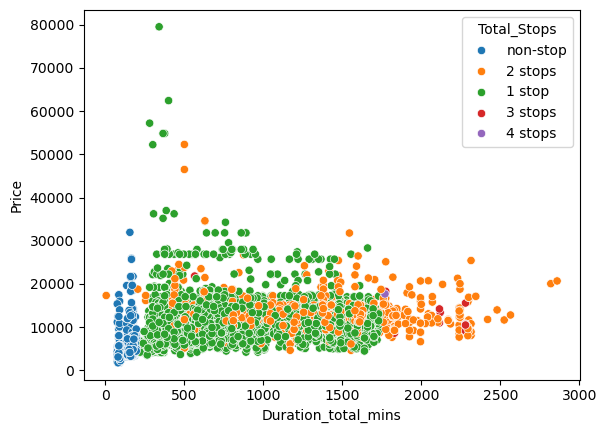

In [487]:
sns.scatterplot(x = 'Duration_total_mins' , y = 'Price' , hue = 'Total_Stops' , data=data)

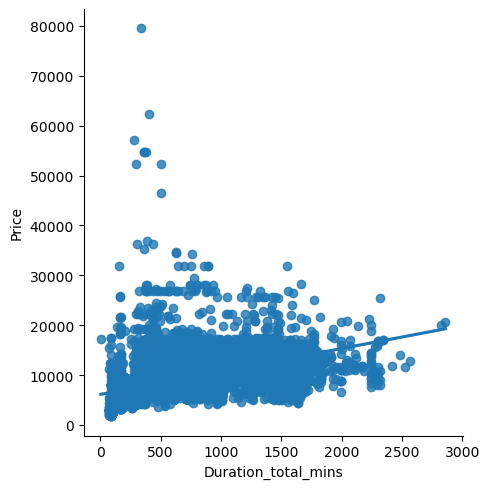

In [488]:
sns.lmplot(x = 'Duration_total_mins' , y = 'Price' ,  data=data)

In [489]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,2,50,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25,2,50,1140


In [490]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

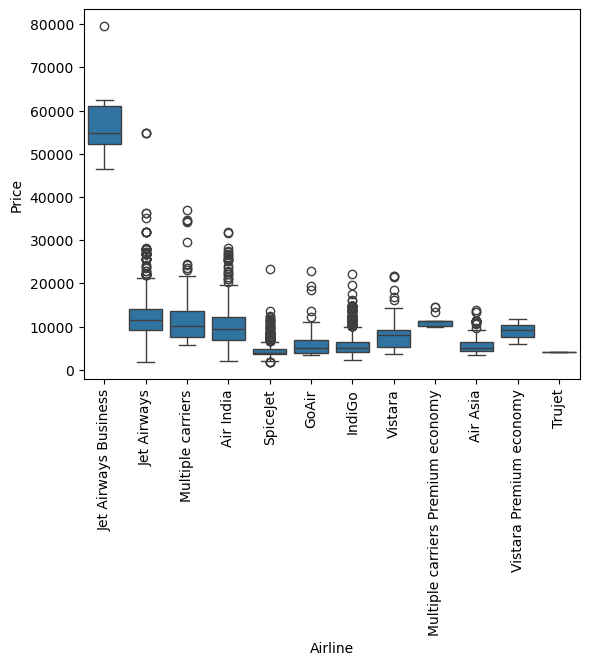

In [491]:
sns.boxplot(y='Price' ,x = 'Airline', data=data.sort_values('Price', ascending=False))
plt.xticks(rotation = "vertical")
plt.show()

In [492]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,2,50,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,6,2019,4,25,9,25,2,50,1140


In [493]:
cat_col = [col for col in data.columns if data[col].dtype == "object"]

In [494]:
num_col = [col for col in data.columns if data[col].dtype != "object"]

In [495]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [496]:
num_col

['Date_of_Journey',
 'Price',
 'Journey_day',
 'Journey_month',
 'Journey_year',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Duration_hours',
 'Duration_minutes',
 'Duration_total_mins']

In [497]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [498]:
data['Source'].apply(lambda x : 1 if x =='Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10682, dtype: int64

In [499]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,2,50,445


In [500]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50,2,50,445


In [501]:
for sub_category in data['Source'].unique():
   data['Source_'+sub_category] = data['Source'].apply(lambda x : 1 if x == sub_category else 0)

In [502]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,2,50,445,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,2,50,1140,0,0,1,0,0


In [503]:
data['Airline'].nunique()

12

In [504]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [505]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [506]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [507]:
dict_airlines = {key:index for index , key in enumerate(airlines , 0)}

In [508]:
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [509]:
data['Airline'] = data['Airline'].map(dict_airlines)

In [510]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [511]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,2,50,445,0,1,0,0,0


In [512]:
data['Destination'].unique

<bound method Series.unique of 0        New Delhi
1         Banglore
2           Cochin
3         Banglore
4        New Delhi
           ...    
10678     Banglore
10679     Banglore
10680        Delhi
10681    New Delhi
10682       Cochin
Name: Destination, Length: 10682, dtype: object>

In [513]:
data['Destination'].replace('New Delhi' , 'Delhi', inplace=True)

In [514]:
data['Destination'].unique

<bound method Series.unique of 0           Delhi
1        Banglore
2          Cochin
3        Banglore
4           Delhi
           ...   
10678    Banglore
10679    Banglore
10680       Delhi
10681       Delhi
10682      Cochin
Name: Destination, Length: 10682, dtype: object>

In [515]:
dest = data.groupby(['Destination'])['Price'].mean().sort_values().index

In [516]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [517]:
dict_dest = {key:index for index , key in enumerate(dest , 0)}

In [518]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [519]:
data['Destination'] = data['Destination'].map(dict_dest)

In [520]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [521]:
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,...,5,50,2,50,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,9,25,2,50,1140,0,0,1,0,0


In [522]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [523]:
stop = {'non-stop':0 , '2 stops':2 , '1 stop':1 , '3 stops':3 , '4 stops':4}

In [524]:
data['Total_Stops'] = data['Total_Stops'].map(stop)

In [525]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [526]:
data.head(1)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0


In [527]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_minutes', 'Duration_total_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [528]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [529]:
data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,0,No info,3897,24,...,22,20,2,50,170,1,0,0,0,0
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,...,5,50,2,50,445,0,1,0,0,0
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2,No info,13882,9,...,9,25,2,50,1140,0,0,1,0,0
3,3,2019-05-12,Kolkata,3,CCU → NAG → BLR,5h 25m,1,No info,6218,12,...,18,5,2,50,325,0,1,0,0,0


In [530]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_minutes', 'Duration_total_mins',
       'Source_Banglore', 'Source_Kolkata', 'Source_Delhi', 'Source_Chennai',
       'Source_Mumbai'],
      dtype='object')

In [531]:
data.drop(columns = ['Date_of_Journey' , 'Additional_Info' , 'Duration_total_mins' , 'Source' , 'Journey_year'] , axis=1 , inplace=True)

In [532]:
data.columns

Index(['Airline', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Price',
       'Journey_day', 'Journey_month', 'Arrival_Time_hour',
       'Arrival_Time_minute', 'Dep_Time_hour', 'Dep_Time_minute',
       'Duration_hours', 'Duration_minutes', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [533]:
data.head(4)

,Airline,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,BLR → DEL,2h 50m,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,CCU → IXR → BBI → BLR,7h 25m,2,7662,1,5,13,15,5,50,2,50,0,1,0,0,0
2,10,4,DEL → LKO → BOM → COK,19h 0m,2,13882,9,6,4,25,9,25,2,50,0,0,1,0,0
3,3,3,CCU → NAG → BLR,5h 25m,1,6218,12,5,23,30,18,5,2,50,0,1,0,0,0


In [534]:
data.drop(columns = ['Route'] , axis = 1 , inplace=True)

In [535]:
data.head(3)

,Airline,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,2h 50m,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,7h 25m,2,7662,1,5,13,15,5,50,2,50,0,1,0,0,0
2,10,4,19h 0m,2,13882,9,6,4,25,9,25,2,50,0,0,1,0,0


In [536]:
data.drop(columns = ['Duration'] , axis = 1 , inplace=True)

In [537]:
data.head(3)

,Airline,Destination,Total_Stops,Price,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hours,Duration_minutes,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,24,3,1,10,22,20,2,50,1,0,0,0,0
1,7,3,2,7662,1,5,13,15,5,50,2,50,0,1,0,0,0
2,10,4,2,13882,9,6,4,25,9,25,2,50,0,0,1,0,0


In [538]:
def plot(df , col):
    fig , (ax1 , ax2 , ax3)  = plt.subplots(3,1)

    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2)
    sns.distplot(df[col] , ax=ax3 , kde=False)

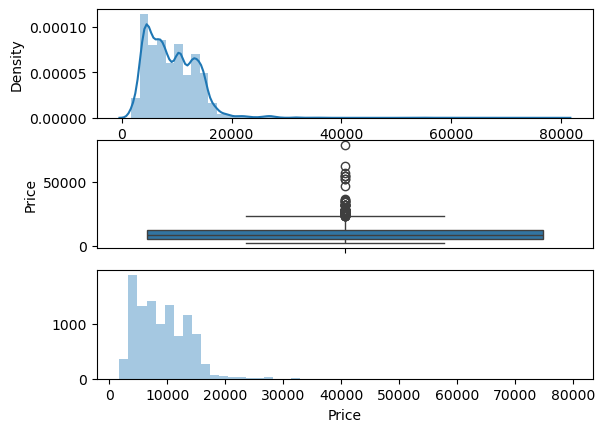

In [539]:
plot(data , 'Price')

In [540]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3 - q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [541]:
print(maximum)

23017.0


In [542]:
print(minimum)

-5367.0


In [543]:
[price for price in data['Price'] if price > maximum or price < minimum]

[27430,
 36983,
 26890,
 26890,
 25139,
 27210,
 52229,
 26743,
 26890,
 25735,
 27992,
 26890,
 26890,
 23583,
 26890,
 23533,
 24115,
 25735,
 54826,
 31783,
 27992,
 26890,
 26890,
 25430,
 36235,
 27210,
 26890,
 25735,
 54826,
 26890,
 35185,
 79512,
 28097,
 27992,
 26890,
 25735,
 26092,
 31825,
 25913,
 25735,
 27992,
 31825,
 23267,
 62427,
 54826,
 31825,
 25430,
 26890,
 36235,
 23843,
 26890,
 25735,
 28322,
 25735,
 25735,
 31825,
 26890,
 27992,
 34273,
 46490,
 29528,
 26890,
 26890,
 26890,
 34503,
 26890,
 27992,
 26890,
 26890,
 23170,
 24528,
 26890,
 27992,
 25735,
 34608,
 25703,
 26890,
 23528,
 31825,
 27282,
 25735,
 27992,
 52285,
 24017,
 31945,
 26890,
 24318,
 23677,
 27992,
 24210,
 57209,
 26890,
 31825,
 26480]

In [544]:
len([price for price in data['Price'] if price > maximum or price < minimum])

94

In [545]:
data['Price'] = np.where(data['Price']>35000 , data['Price'].median() , data['Price'])

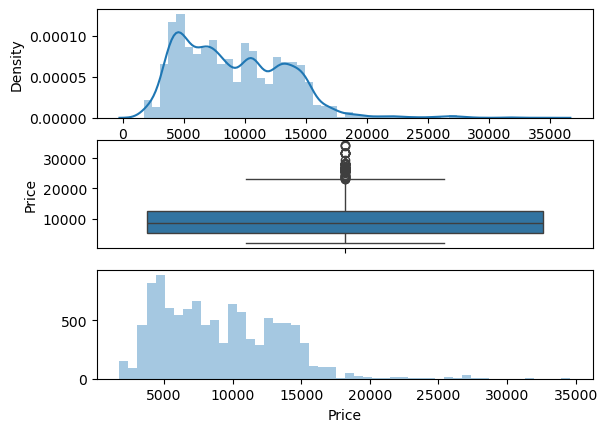

In [546]:
plot(data , 'Price')

In [547]:
y = data['Price']

In [548]:
X = data.drop(['Price'] , axis=1)

In [549]:
from sklearn.feature_selection import mutual_info_regression

In [550]:
imp = mutual_info_regression(X , y)

In [551]:
imp

array([1.31771427, 1.06508846, 0.78856735, 0.37738146, 0.62641867,
       1.14891947, 0.90634632, 0.93063026, 0.75080726, 0.        ,
       0.00998284, 0.38751077, 0.45917725, 0.5204492 , 0.1256933 ,
       0.20192023])

In [552]:
imp_df = pd.DataFrame(imp , index=X.columns)

In [553]:
imp_df.columns = ['importance']

In [554]:
imp_df

,importance
Airline,1.317714
Destination,1.065088
Total_Stops,0.788567
Journey_day,0.377381
Journey_month,0.626419
Arrival_Time_hour,1.148919
Arrival_Time_minute,0.906346
Dep_Time_hour,0.930630
Dep_Time_minute,0.750807
Duration_hours,0.000000


In [555]:
imp_df.sort_values(by = 'importance')

,importance
Duration_hours,0.000000
Duration_minutes,0.009983
Source_Chennai,0.125693
Source_Mumbai,0.201920
Journey_day,0.377381
Source_Banglore,0.387511
Source_Kolkata,0.459177
Source_Delhi,0.520449
Journey_month,0.626419
Dep_Time_minute,0.750807


In [556]:
from sklearn.model_selection import train_test_split

In [557]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [558]:
from sklearn.ensemble import RandomForestRegressor

In [559]:
ml_model = RandomForestRegressor()

In [560]:
ml_model.fit(X_train , y_train)

RandomForestRegressor()

In [561]:
y_pred = ml_model.predict(X_test)

In [562]:
from sklearn import metrics

In [563]:
metrics.r2_score(y_test , y_pred)

0.8183380203195577

In [564]:
y_pred

array([16759.37,  6304.6 ,  8951.29, ...,  3520.34,  6163.27,  6759.74])

In [565]:
import pickle

In [566]:
file = open(r'C:\Users\HP\OneDrive\Desktop\FlightPricePrediction\rf_random.pk1' , 'wb')

In [567]:
pickle.dump(ml_model , file)

In [568]:
model = open(r'C:\Users\HP\OneDrive\Desktop\FlightPricePrediction\rf_random.pk1' , 'rb')

In [569]:
forest = pickle.load(model)

In [570]:
y_pred2 = forest.predict(X_test)

In [571]:
metrics.r2_score(y_test , y_pred2)

0.8183380203195577

In [572]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))*100

In [573]:
mape(y_test , y_pred)

13.013482169061408

In [574]:
from sklearn import metrics

In [575]:
def predict(ml_model):
    model = ml_model.fit(X_train , y_train)
    print("Training score : {}".format(model.score(X_train , y_train)))
    y_prediction = model.predict(X_test)
    print("prediction are : {}".format(y_prediction))
    print("\n")
    r2_score = metrics.r2_score(y_test , y_prediction)
    print("r2 score : {}".format(r2_score))
    print("MAE : {}".format(metrics.mean_absolute_error(y_test , y_prediction)))
    print("MSE : {}".format(metrics.mean_squared_error(y_test , y_prediction)))
    print("RMSE : {}".format((np.sqrt(metrics.mean_squared_error(y_test , y_prediction)))))
    print("MAPE : {}".format(mape(y_test , y_prediction)))
    sns.distplot(y_test - y_prediction)
    

Training score : 0.9505377242859703
prediction are : [16918.61  6105.02  8981.24 ...  3545.83  6172.33  6789.92]


r2 score : 0.818569555951139
MAE : 1151.0649440254822
MSE : 3532015.2518644496
RMSE : 1879.3656514538222
MAPE : 12.97181472333439


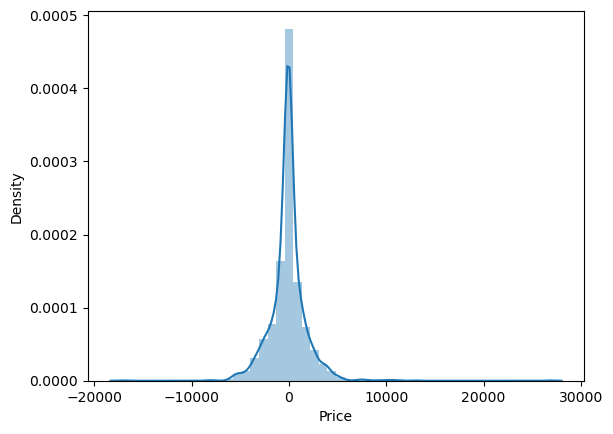

In [576]:
predict(RandomForestRegressor())

In [577]:
from sklearn.tree import DecisionTreeRegressor

Training score : 0.9664729217335591
prediction are : [16840.  4959.  9187. ...  3419.  5797.  6818.]


r2 score : 0.7119418038746033
MAE : 1334.2219830275803
MSE : 5607801.642515184
RMSE : 2368.0797373642604
MAPE : 14.957771345100213


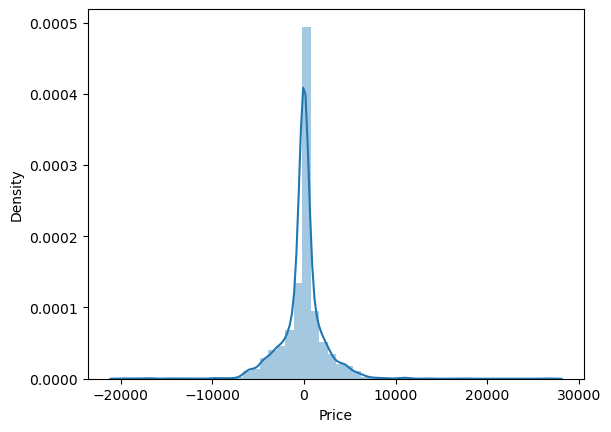

In [578]:
predict(DecisionTreeRegressor())

In [579]:
RandomForestRegressor()

RandomForestRegressor()

In [580]:
from sklearn.model_selection import RandomizedSearchCV

In [581]:
reg_rf =RandomForestRegressor()

In [582]:
np.linspace(start = 100 , stop = 1200 , num = 6)

array([ 100.,  320.,  540.,  760.,  980., 1200.])

In [583]:
n_estimators = [int(x) for x in np.linspace(start = 100 , stop = 1200 , num = 6)]

max_features = ["auto" , "sqrt"]

max_depth = [int(x) for x in np.linspace(start = 5 , stop = 30 , num = 4)]

min_samples_split = [5 , 10 , 15 , 100]

In [584]:
random_grid = {
            "n_estimators" : n_estimators , 
            "max_features" : max_features ,
            "max_depth" : max_depth , 
            "min_samples_split" : min_samples_split
}

In [585]:
random_grid

{'n_estimators': [100, 320, 540, 760, 980, 1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 13, 21, 30],
 'min_samples_split': [5, 10, 15, 100]}

In [586]:
rf_Random = RandomizedSearchCV(estimator = reg_rf , param_distributions=random_grid , cv = 3 , n_jobs = -1 , verbose = 2)

In [ ]:
rf_Random.fit(X_train , y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
rf_Random.best_params_

In [ ]:
rf_Random.best_estimator_

In [ ]:
rf_Random.best_score_

In [ ]:
data.head(3)

In [ ]:
import os
print("Current directory:", os.getcwd())
print("Files in current directory:", os.listdir())


In [ ]:
import shutil
import os

# Define the absolute paths (using raw strings to avoid escape issues)
src = r"C:\Users\HP\flight_prediction.ipynb"
dst = r"C:\Users\HP\OneDrive\Desktop\FlightPricePrediction\flight_prediction.ipynb"

# Move the file
shutil.move(src, dst)

# Verify by listing files in the destination folder
print("Files in destination folder:")
print(os.listdir(r"C:\Users\HP\OneDrive\Desktop\FlightPricePrediction"))


In [ ]:
import pickle

# If your trained model is stored in a variable called `rf_random`
with open('rf_random.pk1', 'wb') as f:
    pickle.dump(rf_random, f)
